In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

# Load the CSV file into a DataFrame
df = pd.read_csv(r'cars.csv')

[1 3 2]


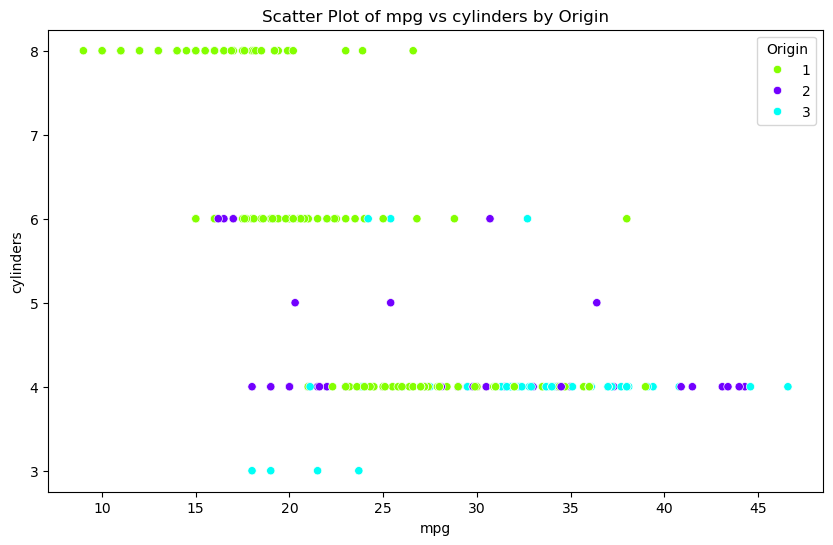

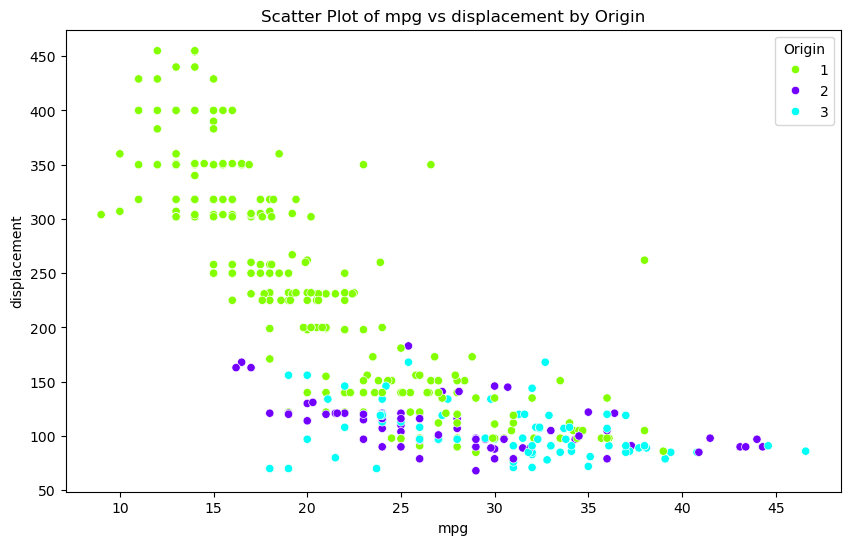

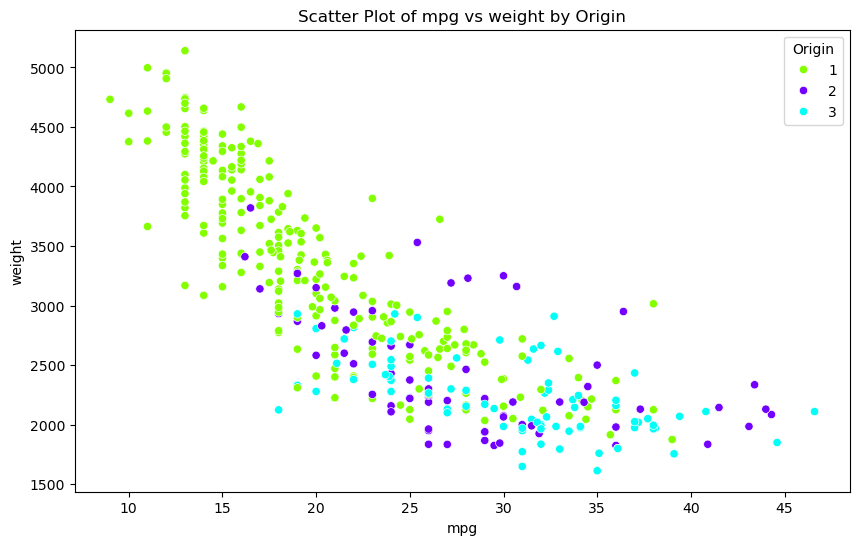

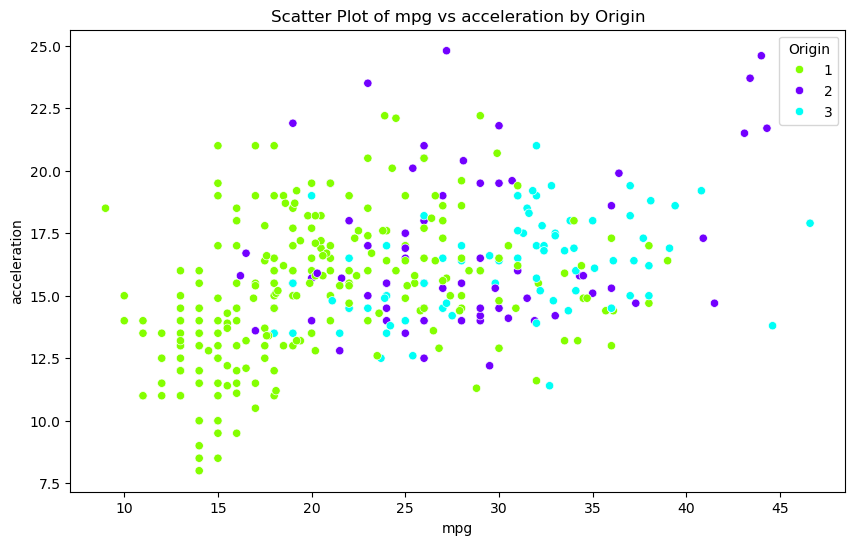

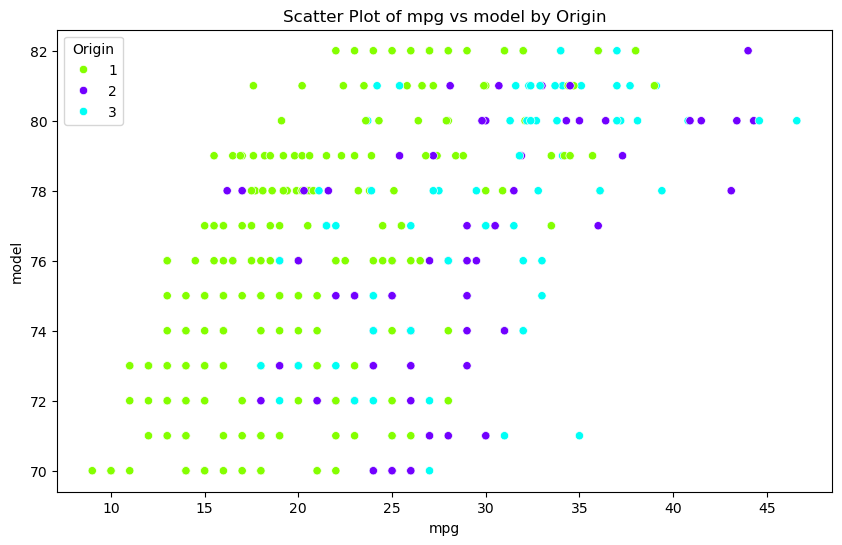

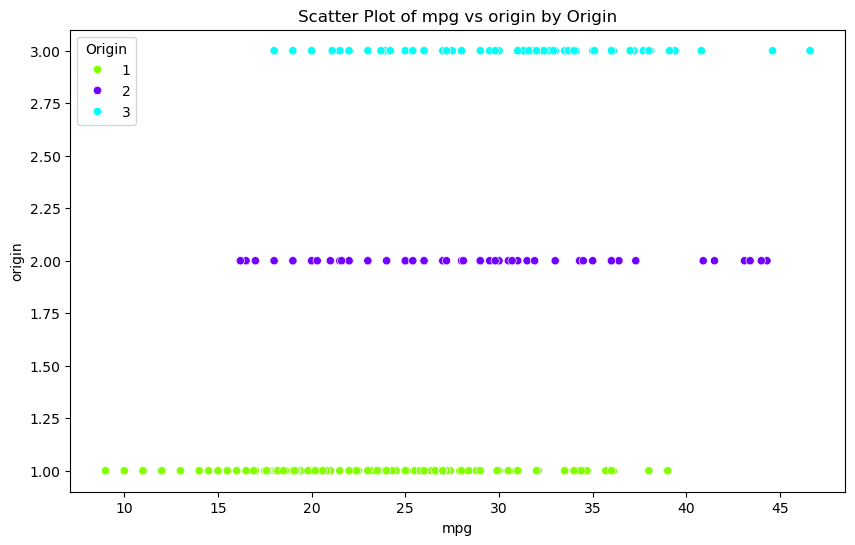

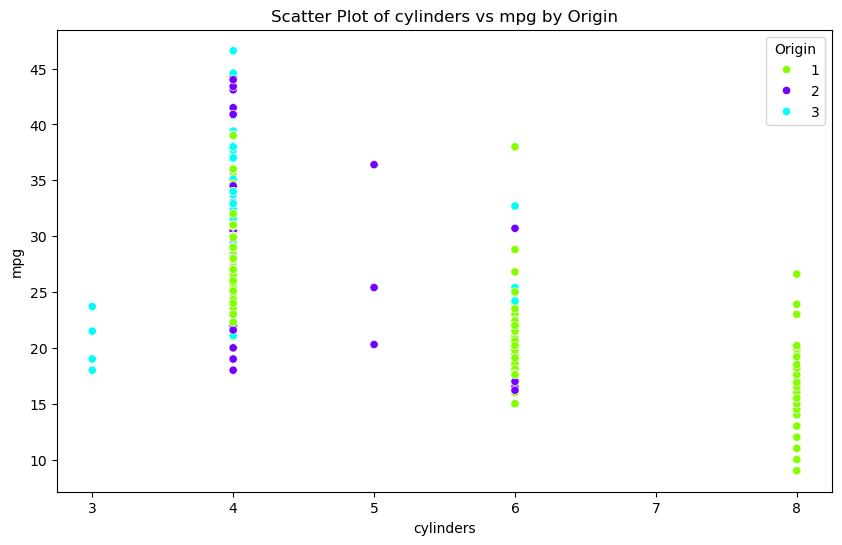

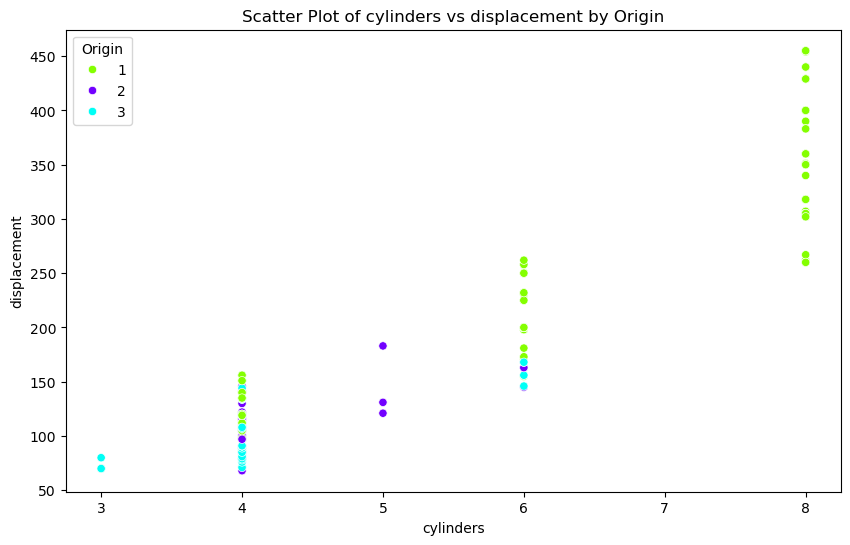

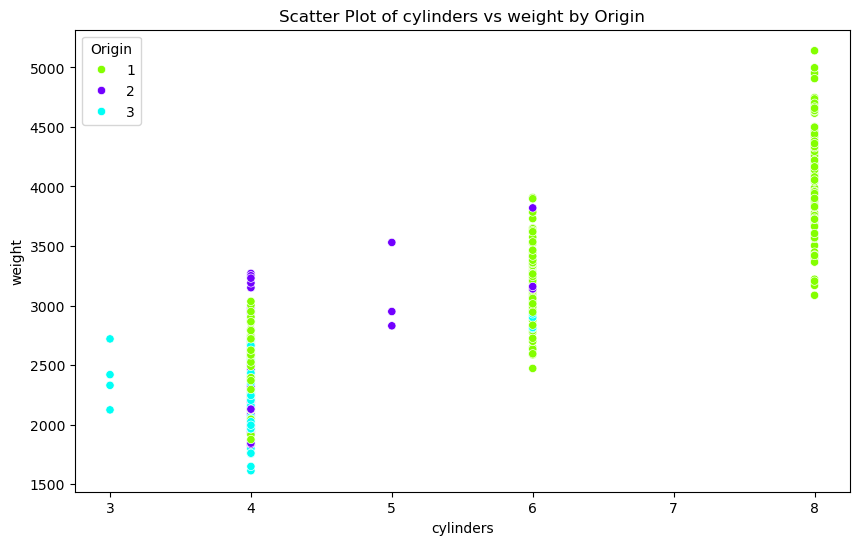

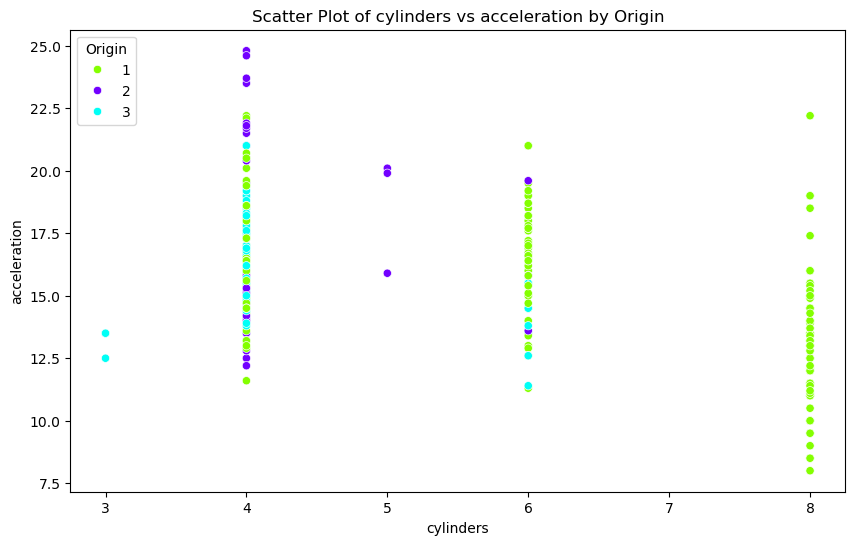

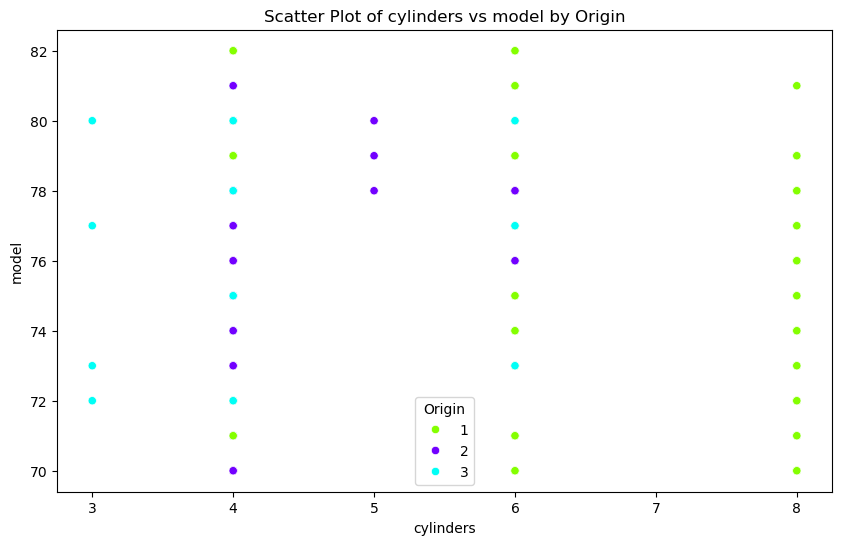

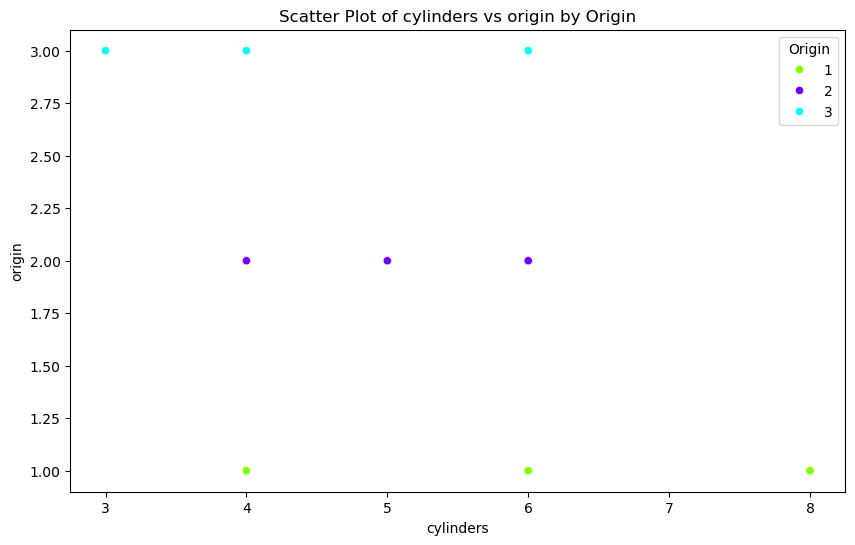

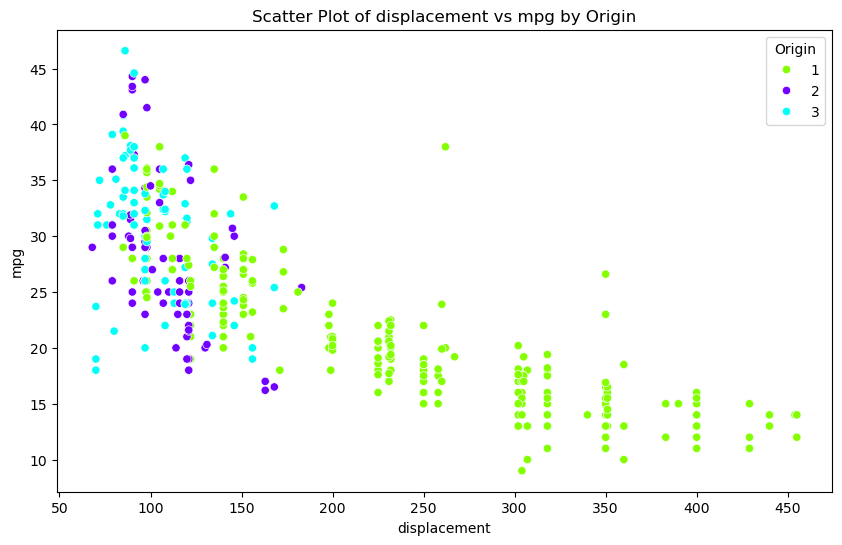

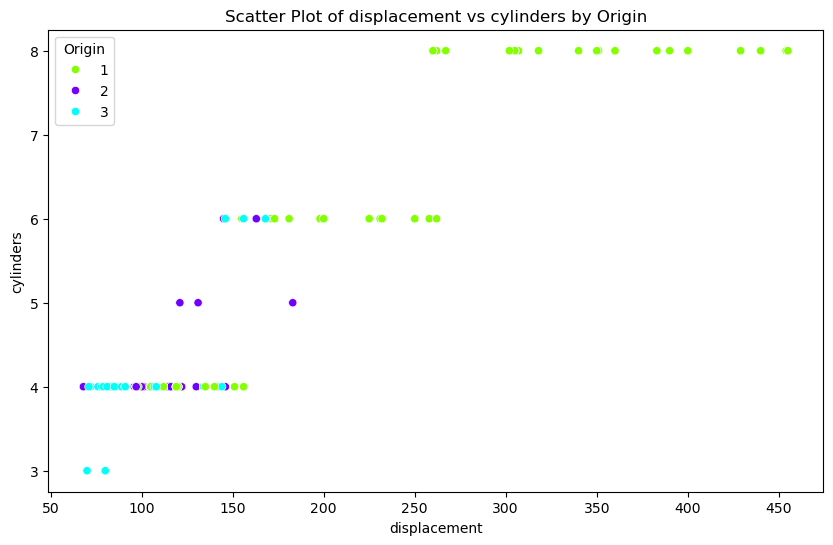

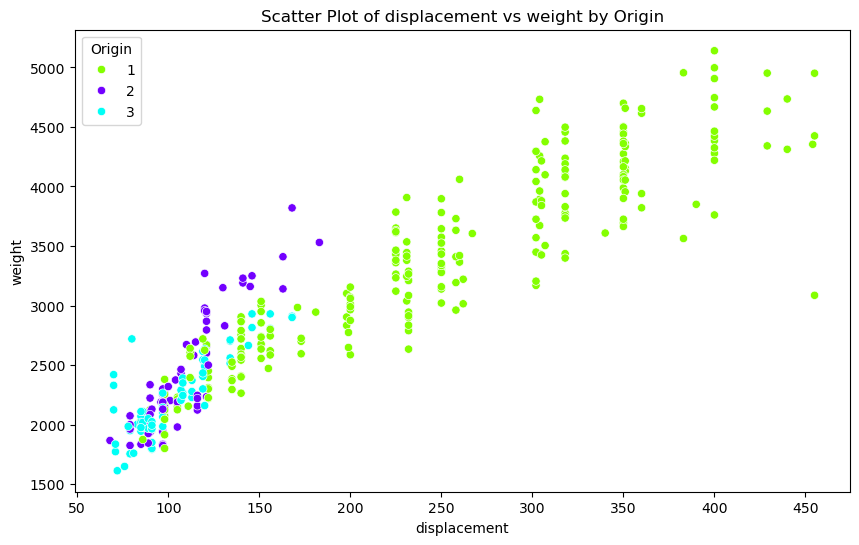

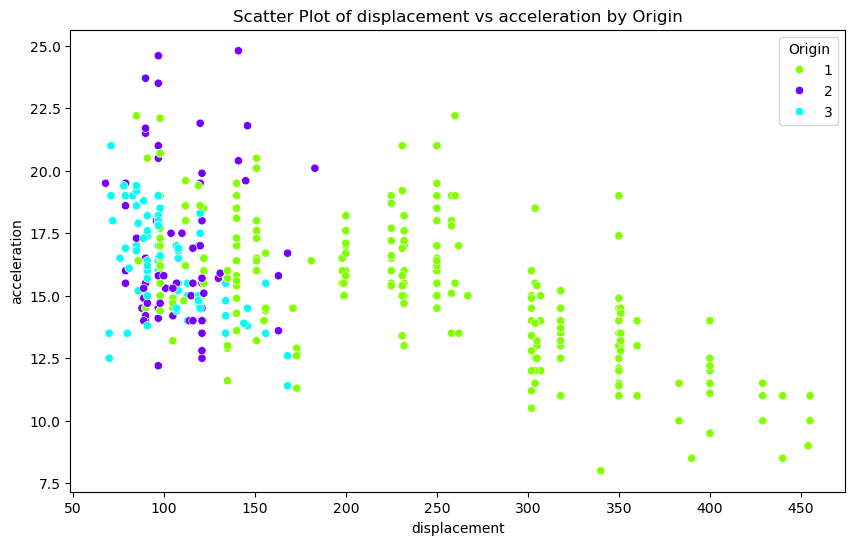

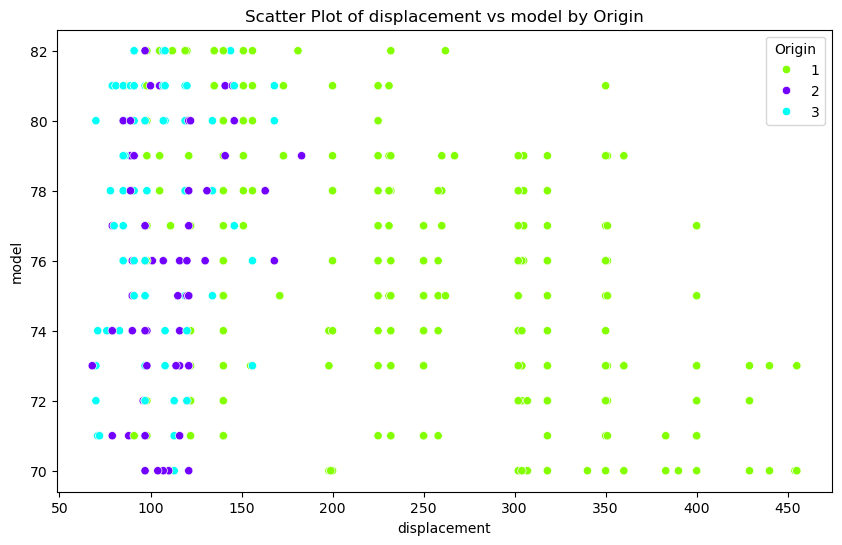

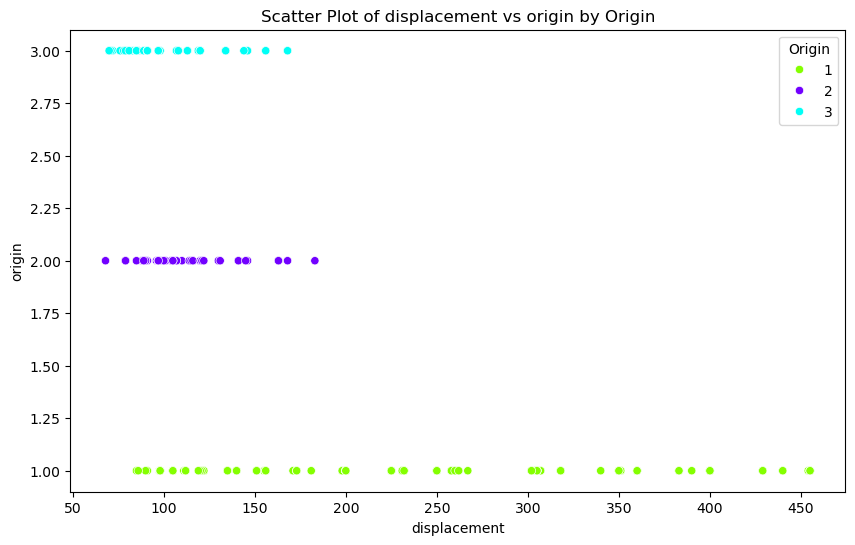

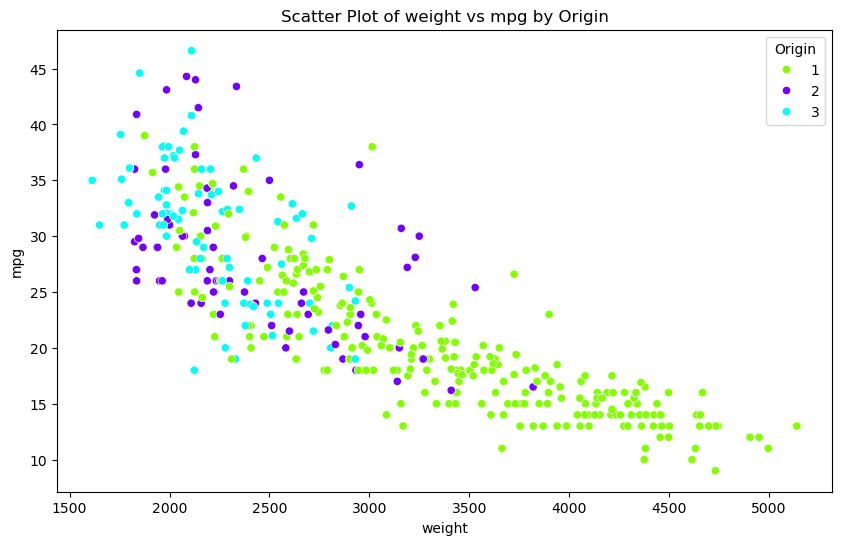

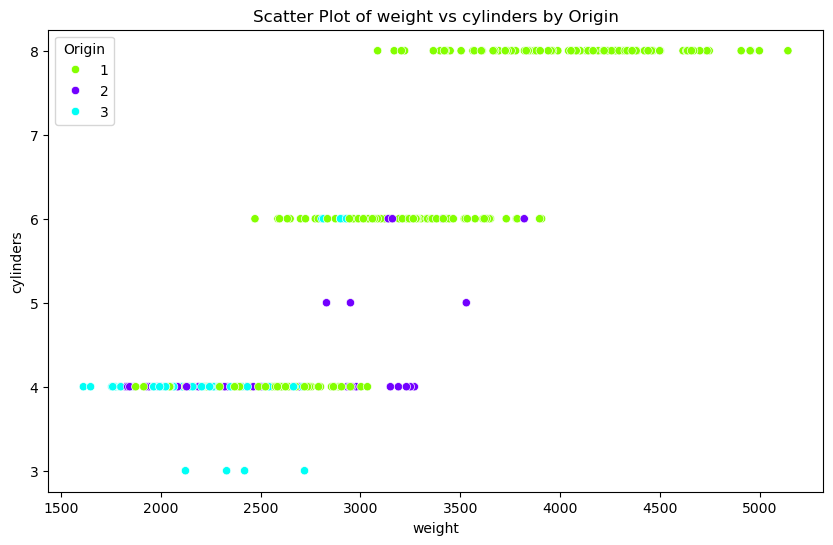

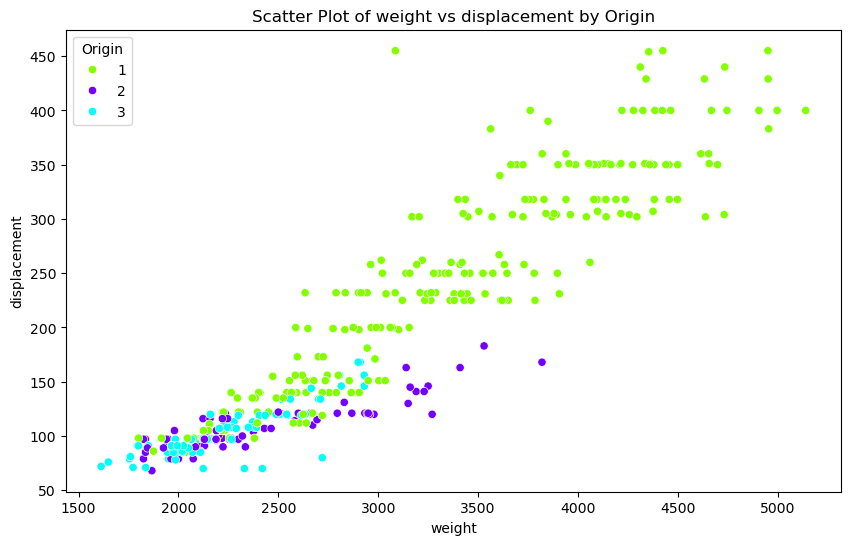

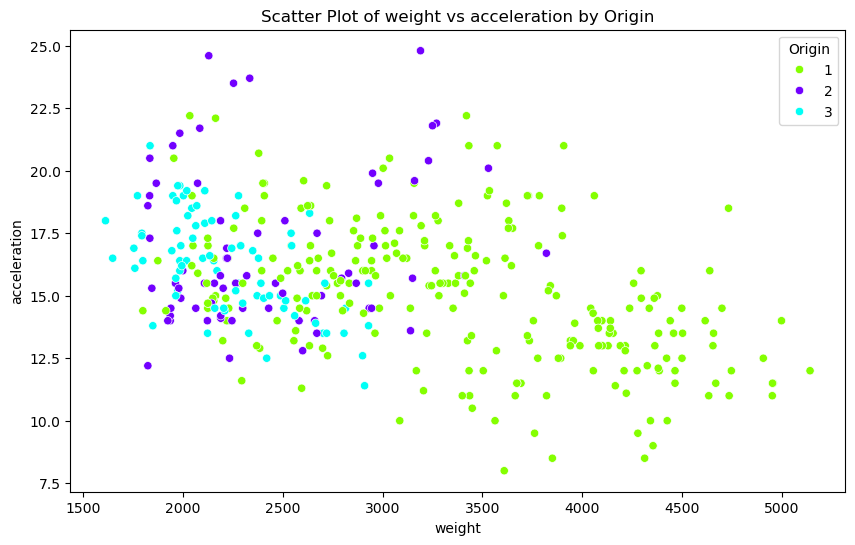

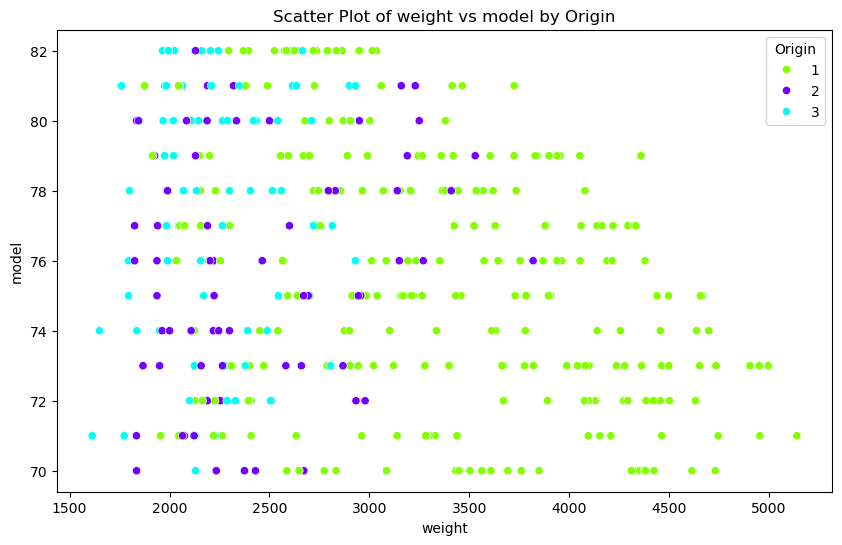

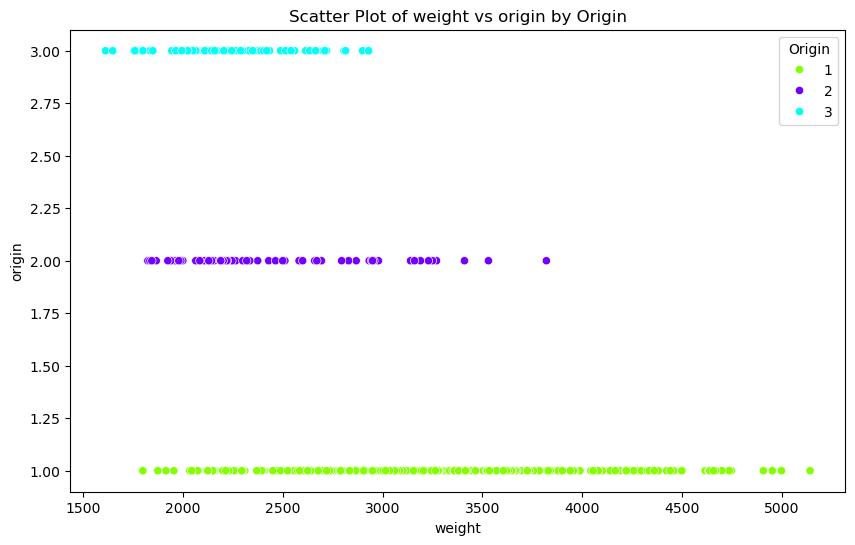

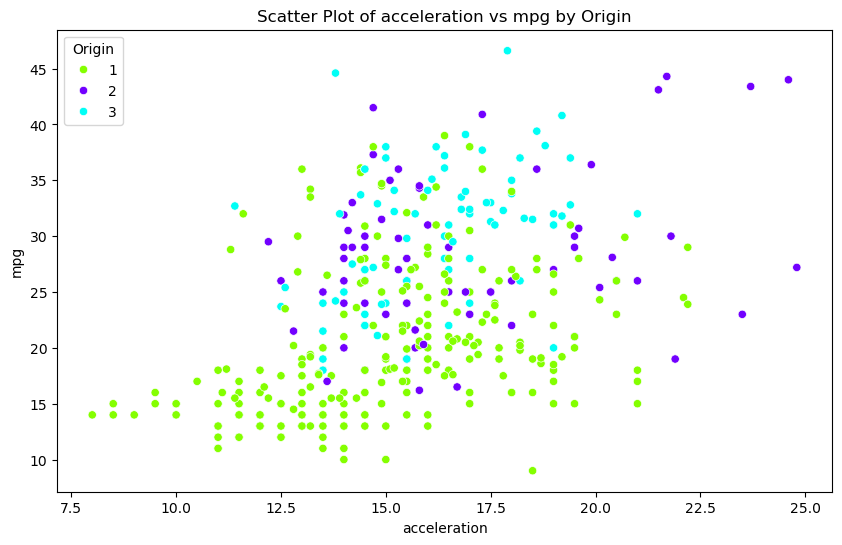

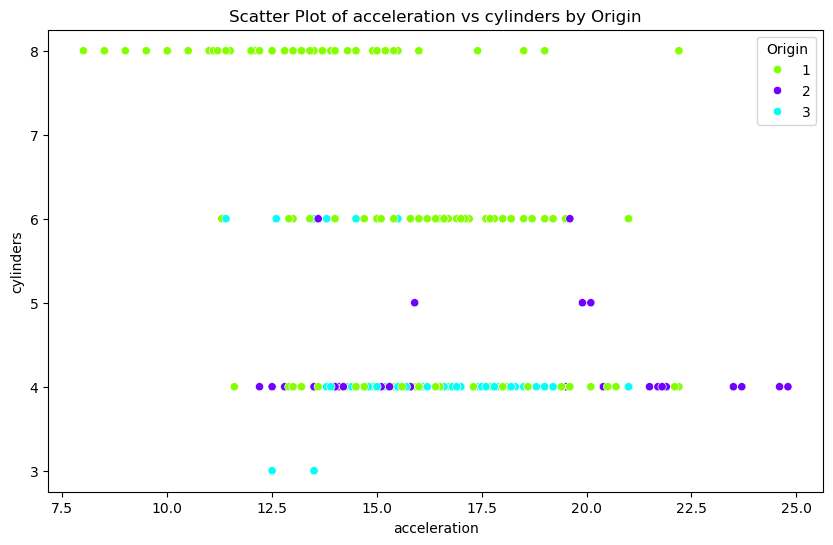

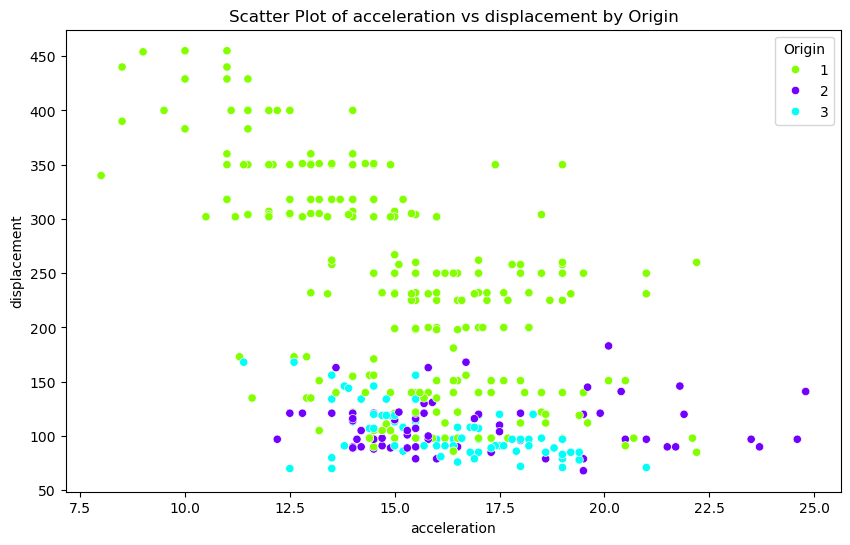

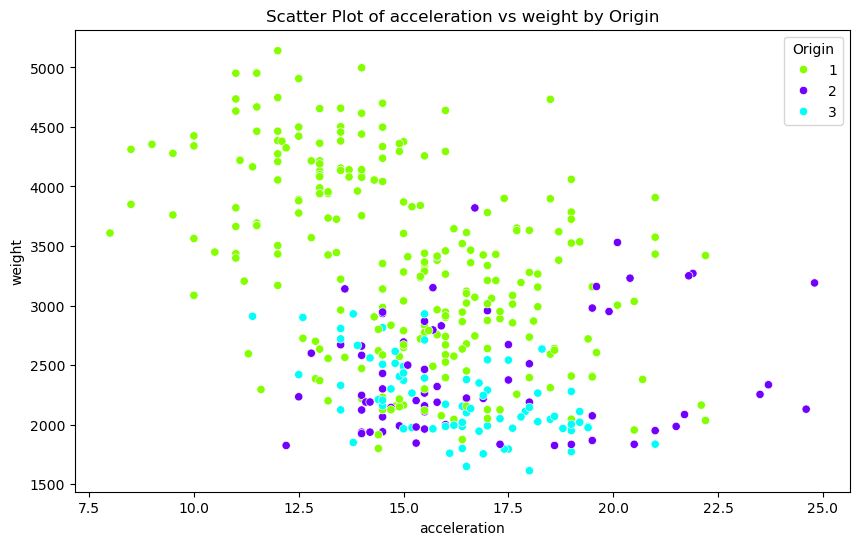

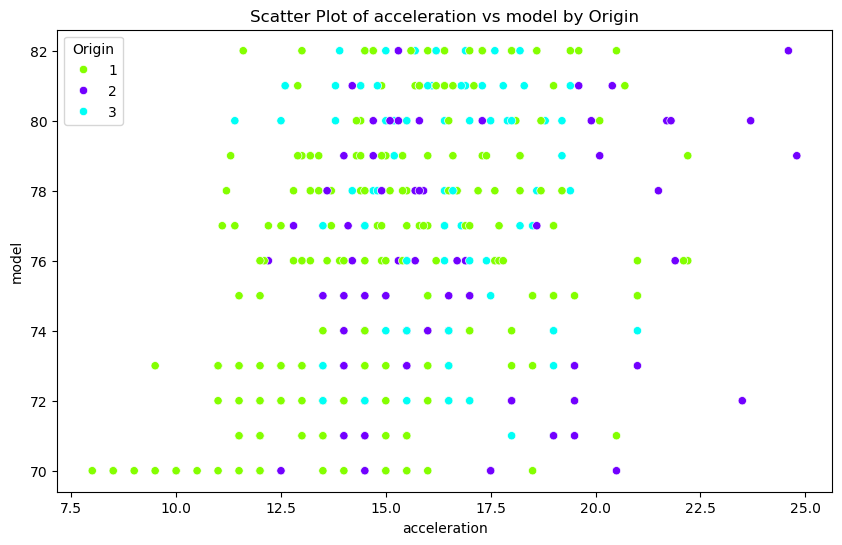

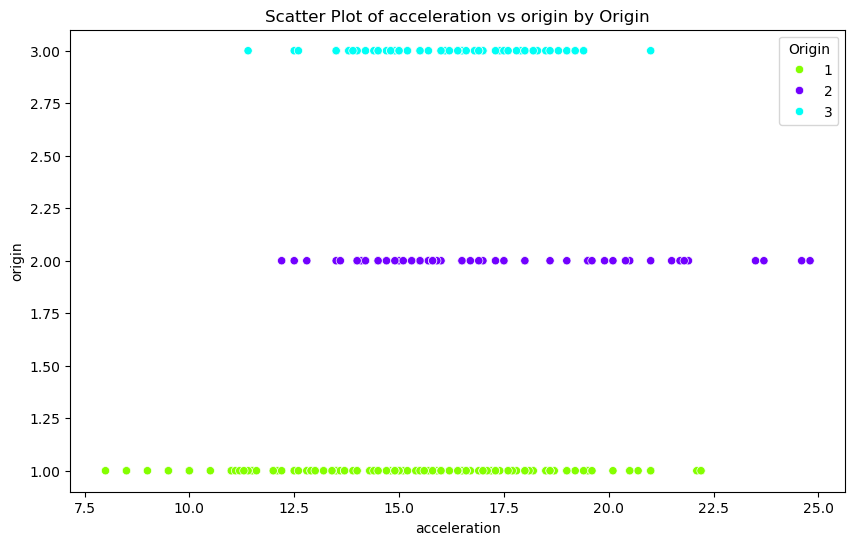

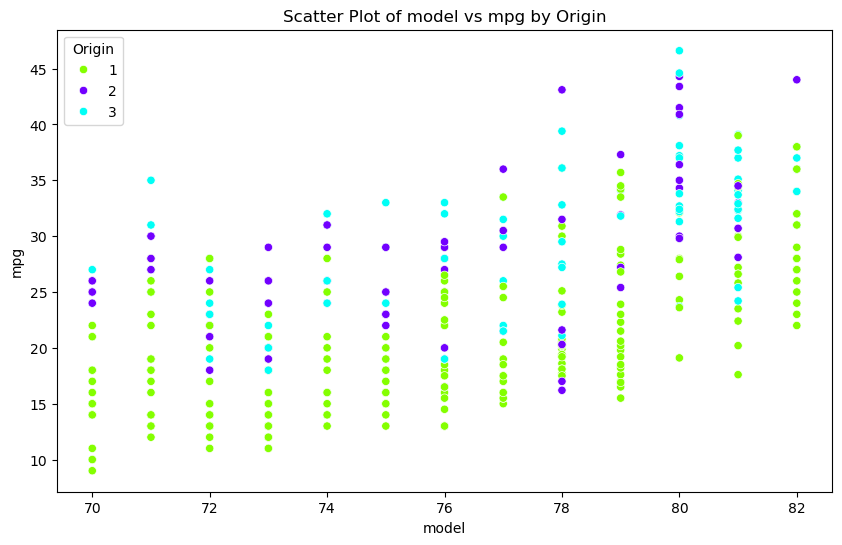

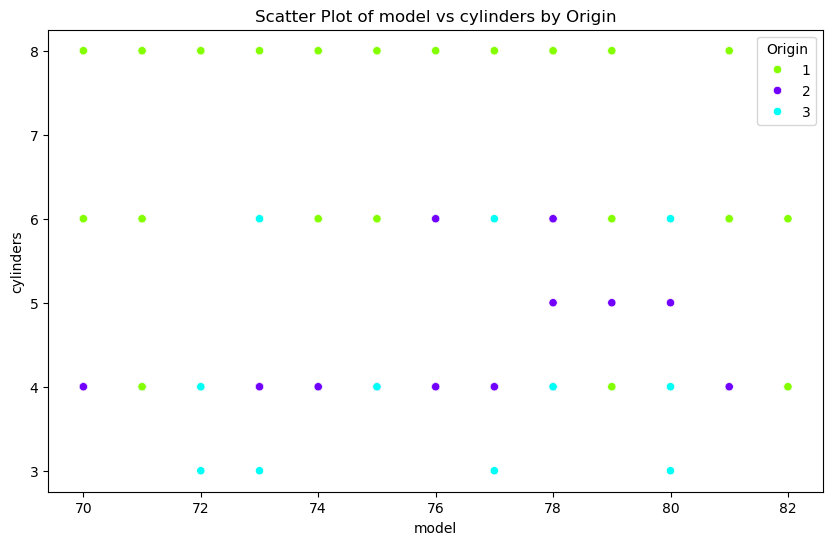

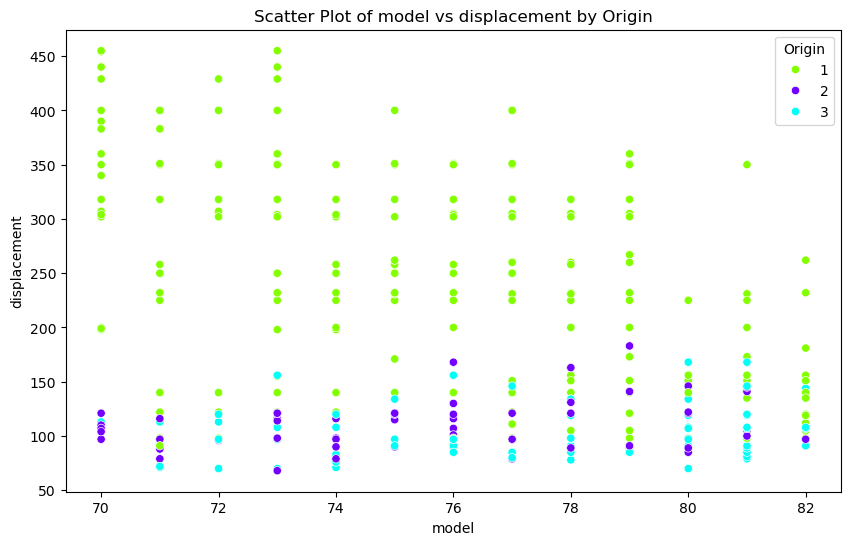

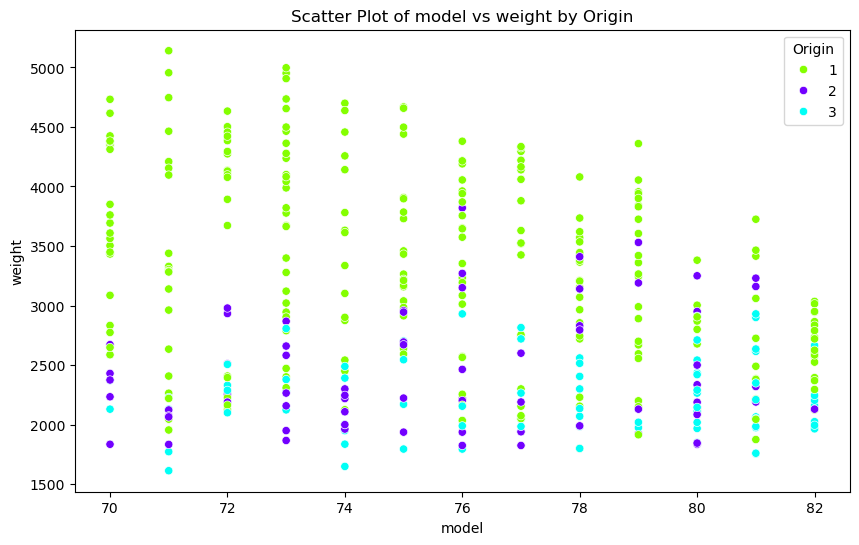

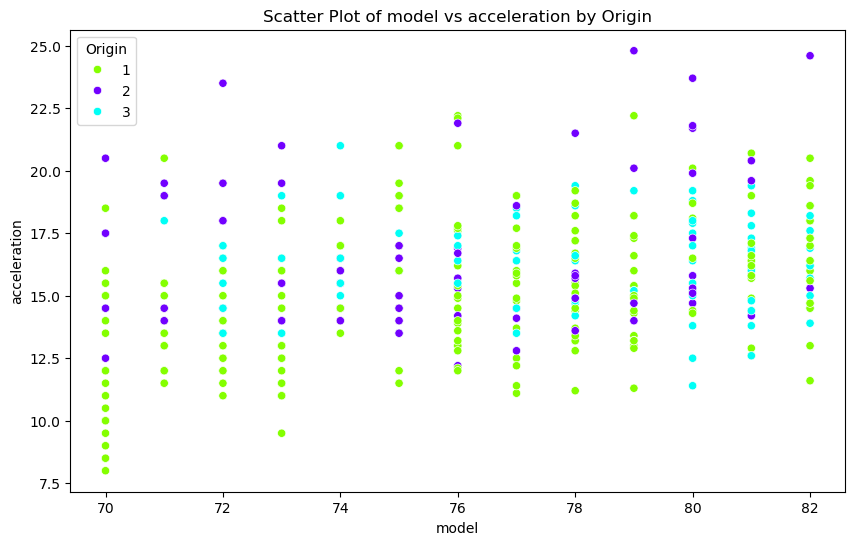

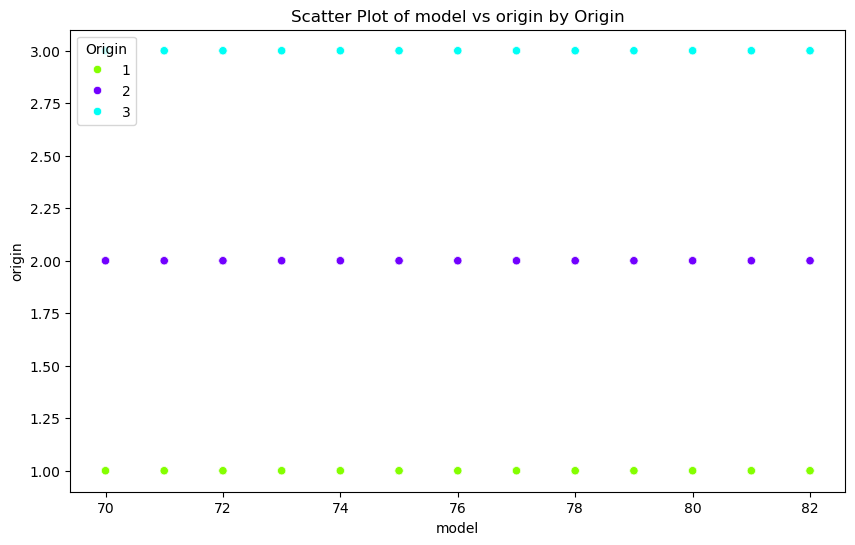

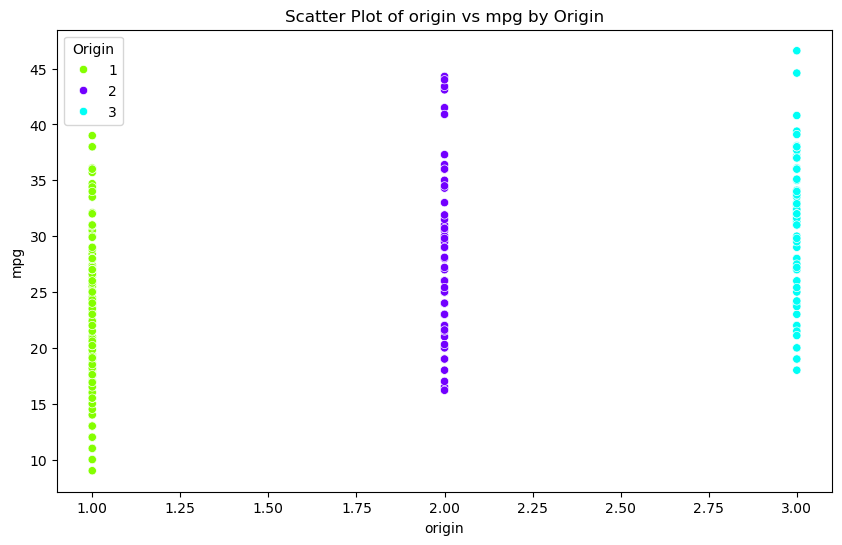

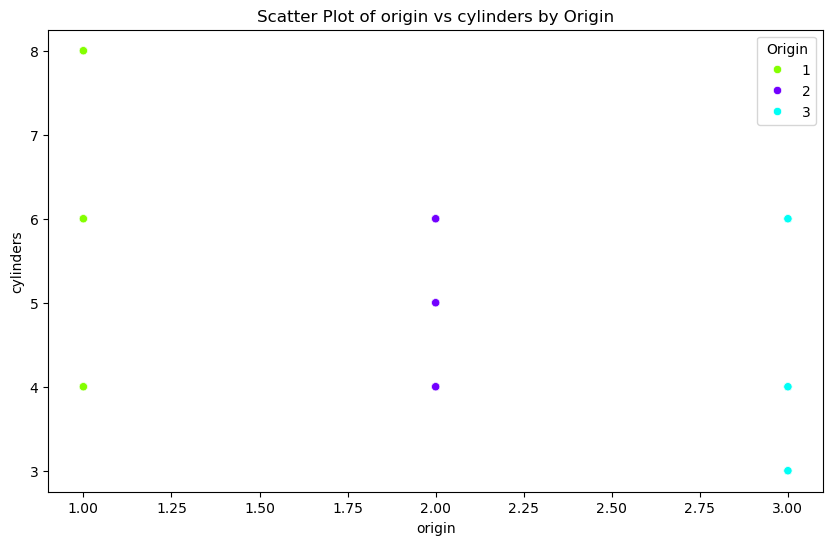

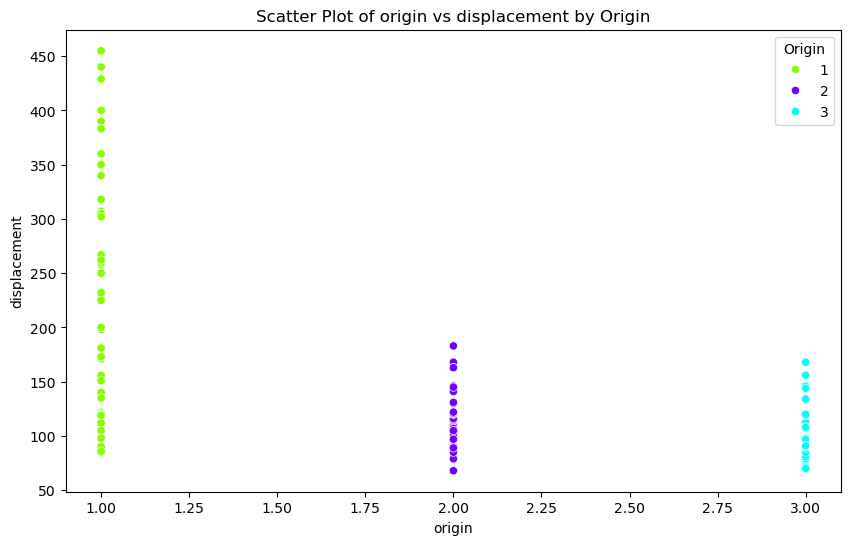

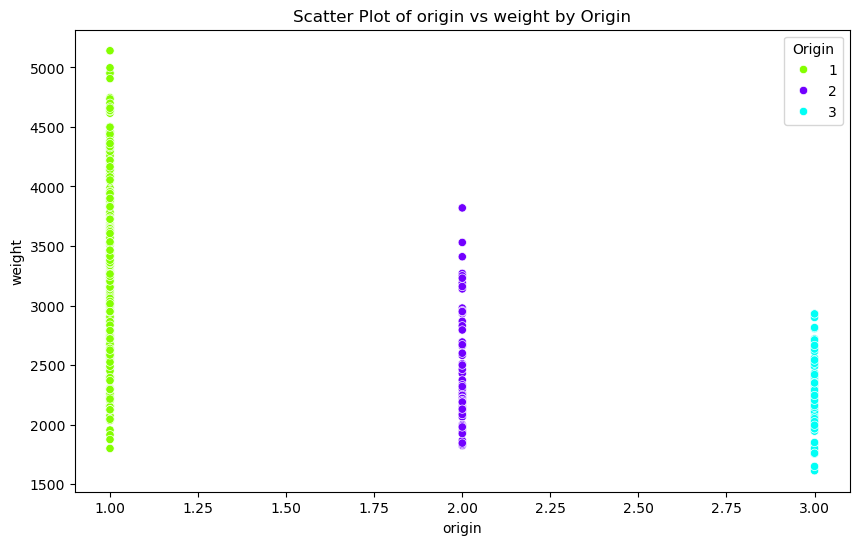

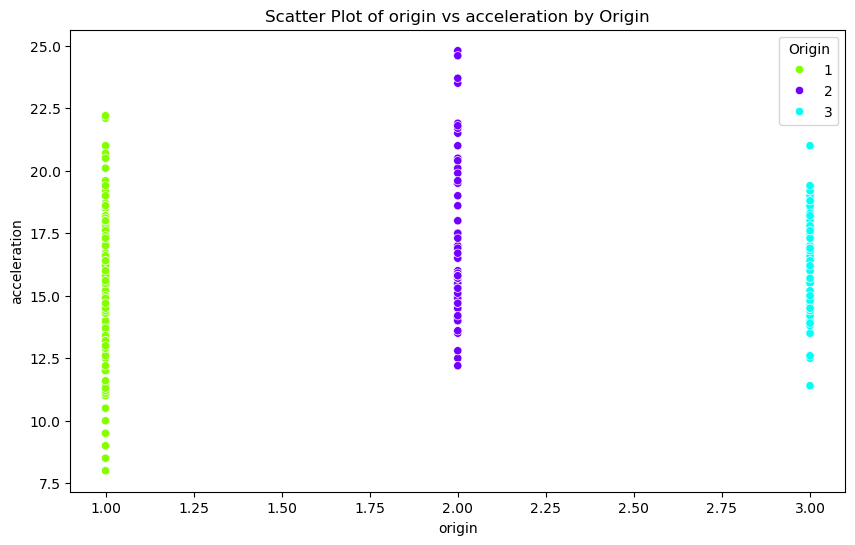

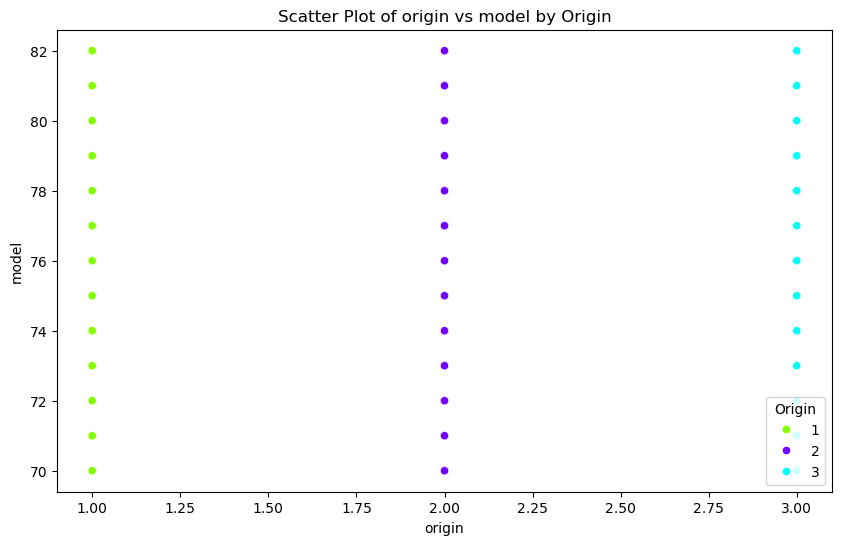

In [3]:
unique_origins = df['origin'].unique()
print(unique_origins)

# Create a color palette with the same number of colors as there are unique origins
# 'hsv' is chosen arbitrarily; many other palettes are available
palette = sns.color_palette("hsv", len(unique_origins))

# Create a dictionary to map origin to color
color_map = dict(zip(unique_origins, palette))

# Filtering out non-numerical columns for simplicity
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create scatter plots
for col1 in numerical_cols:
    for col2 in numerical_cols:
        if col1 != col2:
            plt.figure(figsize=(10, 6))
            sns.scatterplot(data=df, x=col1, y=col2,
                            hue='origin', palette=color_map)
            plt.title(f'Scatter Plot of {col1} vs {col2} by Origin')
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.legend(title='Origin')
            plt.show()

# Part 1
- **Question:** How do vehicles from different origins (USA, Germany, Japan) compare in terms of mpg, weight, and horsepower?

  - **Null Hypothesis $(H0)$:** There is no significant difference in mpg, weight, and horsepower among vehicles from different origins.
  - **Alternate Hypothesis $(H1)$:** There are significant differences in mpg, weight, and horsepower among vehicles from different origins.

origin
1    249
3     79
2     70
Name: count, dtype: int64


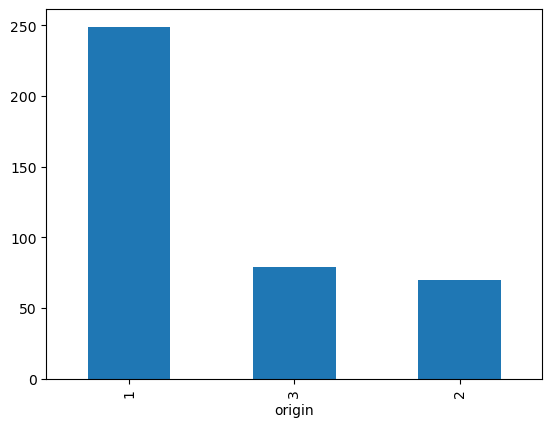

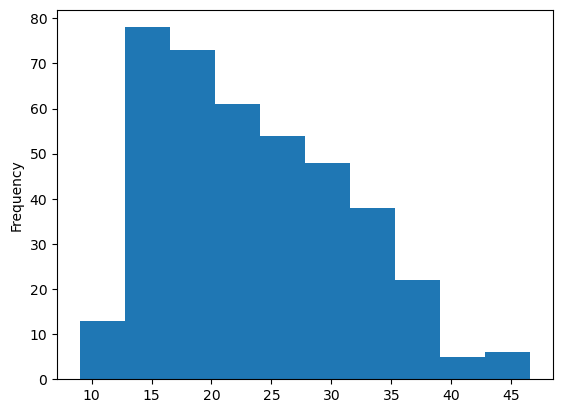

ValueError: could not convert string to float: '?'

In [21]:
originCounts = df['origin'].value_counts()
print(originCounts)
originCounts.plot(kind='bar')
plt.show()

df['mpg'].plot(kind='hist')
plt.show()

usa = df[df['origin'] == 1]
germany = df[df['origin'] == 2]
japan = df[df['origin'] == 3]

mpg_test = scipy.stats.f_oneway(usa['mpg'], germany['mpg'], japan['mpg'])
weight_test = scipy.stats.f_oneway(usa['weight'], germany['weight'], japan['weight'])
horsepower_test = scipy.stats.f_oneway(
    usa['horsepower'], germany['horsepower'], japan['horsepower']).dropna()

print(df.dtypes())
# print(f'mpg = {mpg_test}, weight = {weight_test}, ')

# Part 2

- **Question:** Are vehicles from Japan generally more fuel-efficient compared to those from the USA?

  - **Null Hypothesis $(H0)$:** Vehicles from Japan are not significantly more fuel-efficient compared to those from the USA.
  - **Alternate Hypothesis $(H1)$:** Vehicles from Japan are significantly more fuel-efficient compared to those from the USA.